zsh:1: command not found: python.exe
[33. 46. 42. 30. 36. 51. 24. 37. 48. 34.]
[1 0 0 1 1 0 1 1 0 0]
0.50094
0.47137
[2. 4. 3. 1. 2. 5. 1. 3. 4. 2.]
[0.07780384 0.77637271 0.69846821 0.05479929 0.1074877  0.8554277
 0.0249979  0.11900011 0.81057035 0.51595344]
[0 1 1 0 0 1 1 0 1 1]
0.62593765068764
0.59762
Always taker    47606
Complier        40647
Never taker     11747
dtype: int64
      kids0 kids1  Тип индивида
0         0     1      Complier
1         1     1  Always taker
2         0     1      Complier
3         0     1      Complier
4         0     1      Complier
...     ...   ...           ...
99995     0     1      Complier
99996     1     1  Always taker
99997     1     1  Always taker
99998     1     1  Always taker
99999     0     1      Complier

[100000 rows x 3 columns]
0.73699
                             Оценка
Corr(kids, family_values)  0.694787
Corr(kids, religion)       0.535486
                   Оценка
Var(eps0)        0.932234
Var(g0)        441.998763
Var(g0_o

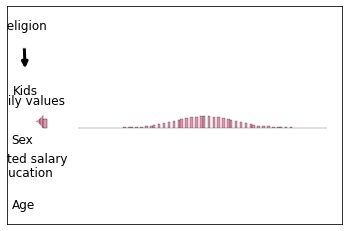

In [ ]:
!python.exe -m pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install openpyxl
!pip install doubleml
#Подключим необходимые библиотеки
import numpy as np
import pandas as pd
import scipy as scipy
from copy import deepcopy
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, logistic
import seaborn
import networkx as nx

# Визуализируем предполагаемые связи

# Стиль отображения графика
nx_options = {
    'node_color': 'white',
    'node_size': 2000,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

# Связи
edges = [
    ('Kids', 'Waited salary'),         # (откуда стрелочка, куда стрелочка)
    ('Age', 'Waited salary'),
    ('Sex', 'Waited salary'),
    ('Education', 'Waited salary'),
    ('Family values', 'Waited salary'),
    ('Family values', 'Kids'),
    ('Religion', 'Kids'),


]

# Инициализируем граф
G = nx.DiGraph(directed = True)
G.add_edges_from(edges)

# Отображаем граф
np.random.seed(8)
nx.draw_networkx(G, arrows = True, **nx_options)

# Для воспроизводимости
np.random.seed(123)

# Число наблюдений
n = 100000

np.random.seed(123)
# Предположим, что распределение возраста схоже с нормальным
age = norm.rvs(size = n, loc = 40, scale = 6.4)

# Для красоты ограничим минимальные и максимальные значения
#age = age[(age<=70) & (age>=14)]
#age[age >= 70] = 70
#age[age <= 14]  = 14

# Также, для удобства введем округление
age = np.round(age)

# Посмотрим на несколько первых значений
print(age[0:10])

# Посмотрим на распределение
seaborn.histplot(age,                        # данные
                 stat = 'density',           # тип гистограммы
                 color = "palevioletred",    # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins = 100)                 # число столбиков в Гистограмме

np.random.seed(123)
# Сгенерируем переменную пол
sex = np.random.binomial(n = 1, p = 0.5, size = n)

# Посмотрим на первые несколько значение
print(sex[0:10])

# Доля мужчин
print(np.mean(sex))

np.random.seed(123)
# Сгенерируем переменную наличия высшего образования
education = np.random.binomial(n = 1, p = 0.47, size = n)

# Доля индивидов, состоящих в браке
print(np.mean(education))

# Для воспроизводимости
np.random.seed(123)

# Число наблюдений
n = 100000

# Предположим, что семейные ценности нормально распределены с центром на 3 и стандартным отклонением 1
family_values = np.random.normal(loc=3, scale=1, size=n)

# Ограничим значения в пределах 1-5
family_values[family_values >= 5] = 5
family_values[family_values <= 1] = 1

# Также, для удобства введем округление
family_values = np.round(family_values)

# Посмотрим на несколько первых значений
print(family_values[:10])

seaborn.histplot(family_values,
             stat='density',       # Статистика гистограммы
             color="palevioletred", # Цвет гистограммы
             label="histogram",     # Наименование гистограммы
             bins=5)                # Число столбиков в гистограмме

# Сформируем индекс
religion_index = 0.06 * age - 1.0 * sex - 0.6 * education + 0.2 * sex * education - 2.0

np.random.seed(123)
# Создадим условные вероятности
religion_prob = norm.cdf(religion_index)

# Посмотрим на несколько первых условных вероятностей
print(religion_prob[0:10])

np.random.seed(123)
# Сгенерируем наличие религиозность человека
religion = np.random.binomial(n = 1, p = religion_prob, size = None)

# Посмотрим на несколько сгенерированных значений
print(religion[0:10])

# Дисперсия индекса
print(np.var(religion_index))

# Доля религиозных людей
print(np.mean(religion))

np.random.seed(123)
# Равномерные случайные величины
u = uniform.rvs(size = n)

# Сгенерируем часть индекса, не зависящую от религии
kids_index = 5 * np.log(family_values + 1) + np.sqrt(age) - 15 + 1.5 * sex + 2 * education

# Симулируем факт наличия детей в случае,
# когда человек религиозен
religion1  = 1
kids1_index = kids_index + 3 * religion1
kids1_prob  = logistic.cdf(kids1_index)
kids1      = (kids1_prob >= u).astype(int)

# Доля людей с детьми в случае, когда все
# религиозны
np.mean(kids1)

# Симулируем факт наличия детей в случае,
# когда человек не религиозен
religion0    = 0
kids0_index = kids_index + 6 * religion0
kids0_prob  = logistic.cdf(kids0_index, scale = 1)
kids0      = (kids0_prob >= u).astype(int)

# Доля людей с детьми в случае, когда все
# нерелигиозны
np.mean(kids0)

#Индивидов можно разделить на  4  группы:
#Always takers - те, у кого  Educ0𝑖=Educ1𝑖=1 : заводят детей независимо от религиозности
#Never takers- те, у кого  Educ0𝑖=Educ1𝑖=0 : не заводят детей независимо от религиозности
#Compliers - те, у кого  Educ1𝑖=1  и  Educ0𝑖=0 , то есть  Educ1𝑖>Educ0𝑖 : заводят детей, если они религиозны.
#Deniers - те, у кого  Educ1𝑖=0  и  Educ0𝑖=1 , то есть  Educ1𝑖<Educ0𝑖 : заводят детей, если они нерелигиозны.
#Для соблюдения предпосылок используемых методов важно отсутствие Deniers, что гарантируется используемым процессом генерации данных.

# Рассмотрим различные группы индивидов
ind_type = np.empty(n, dtype = 'U25')
ind_type[(kids1 == 1) & (kids0 == 1)] = 'Always taker'
ind_type[(kids1 == 0) & (kids0 == 0)] = 'Never taker'
ind_type[kids1 > kids0]               = 'Complier'
ind_type[kids1 < kids0]               = 'Denier'

# Посмотрим на распределение индивидов разного типа
print(pd.value_counts(ind_type))

# Сравним уровни образования для одного и того же индивида в случаях,
# когда у его родителей нет высшего образования и когда оно у них есть
print(pd.DataFrame(data    = np.array([kids0, kids1, ind_type]).transpose(),
                   columns = ['kids0', 'kids1', 'Тип индивида']))

# Факт наличия у индивида высшего образования
kids = kids1 * religion + kids0 * (1 - religion)

# Доли людей с высшим образованием
print(np.mean(kids))

# Рассмотрим корреляции
print(pd.DataFrame(data    = [np.corrcoef(kids, family_values)[0, 1],
                              np.corrcoef(kids, religion)[0, 1]],
                   index   = ['Corr(kids, family_values)',
                              'Corr(kids, religion)'],
                   columns = ['Оценка']))

np.random.seed(123)
# Случайные ошибки
error0 = t.rvs(size = n, df = 15)*0.9
error1 = expon.rvs(size = n, scale = 2) - 10

error0.var()

np.random.seed(123)
# Функция от контрольных переменных
  # когда у индивида нет детей
g0_obs = 51 * education / ( 1.5 * sex + 1) + 8 + 0.5 * age - 0.01*age**2
g0_unobs = 20 * family_values
g0 = g0_obs + g0_unobs
  # когда у индивида есть дети
g1_obs = 60 * education / ( 2.0 * sex + 1) + 8 +0.6 * age-0.01*age**2
g1_unobs = 25 * family_values
g1 = g1_obs + g1_unobs
# Ожидаемая зрплата в зависимости от наличия детей
waited_salary0 = g0 + error0
waited_salary1 = g1 + error1

# Наблюдаемая зарплата
waited_salary = waited_salary1 * kids + waited_salary0 * (1 - kids)

# Приблизительно оценим адекватность дисперсий
print(pd.DataFrame(data    = [np.var(error0),   np.var(g0),
                              np.var(g0_obs),   np.var(g0_unobs),
                              np.var(error1),   np.var(g1),
                              np.var(g1_obs),   np.var(g1_unobs)],
                   index   = ['Var(eps0)',     'Var(g0)',
                              'Var(g0_obs)',   'Var(g0_unobs)',
                              'Var(eps1)',     'Var(g1)',
                              'Var(g1_obs)',   'Var(g1_unobs)'],
                   columns = ['Оценка']))

#Аггрегируем данные в датафрейм
df = pd.DataFrame({'waited_salary': waited_salary, 'kids': kids,
                   'age': age, 'sex': sex,'education': education,'religion': religion})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10).style.format(precision = 2)

print(df['waited_salary'].min(), df['waited_salary'].max())

In [ ]:
import numpy as np
import pandas as pd
import scipy as scipy
from copy import deepcopy
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, logistic
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Задание 1

In [ ]:
required_columns = ['age', 'sex', 'education', 'religion', 'kids']
for col in required_columns:
    if col not in df.columns:
        print(f"Column {col} is missing") #ПРоверка наличия всех колонок в дф

In [ ]:
X = df[['age', 'sex', 'education', 'religion']]
y = df['kids']

In [ ]:
#Делим на тестовую и тренировочная выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Метод ближайших соседей
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("Метод ближайших соседей:")
print(classification_report(y_test, knn_predictions))

Метод ближайших соседей:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5245
           1       0.95      0.99      0.97     14755

    accuracy                           0.95     20000
   macro avg       0.96      0.92      0.94     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
# Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Случайный лес:")
print(classification_report(y_test, rf_predictions))

Случайный лес:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      5245
           1       0.95      0.99      0.97     14755

    accuracy                           0.96     20000
   macro avg       0.96      0.92      0.94     20000
weighted avg       0.96      0.96      0.95     20000



In [ ]:
# Логистическая регрессия
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Логистическая регрессия:")
print(classification_report(y_test, lr_predictions))

Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5245
           1       0.97      0.95      0.96     14755

    accuracy                           0.94     20000
   macro avg       0.92      0.94      0.93     20000
weighted avg       0.95      0.94      0.95     20000



# Задание 2

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Задание гиперпараметров для каждого метода
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Оценка точности на тренировочной выборке
models = {'KNN': knn_model,
          'Random Forest': rf_model,
          'Logistic Regression': lr_model}

train_scores = {}
test_scores = {}
cv_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Точность на тренировочной выборке
    train_scores[name] = model.score(X_train, y_train)

    # Точность на тестовой выборке
    test_scores[name] = model.score(X_test, y_test)

    # Точность с кросс-валидацией
    cv_scores[name] = cross_val_score(model, X_train, y_train, cv=5).mean()

In [ ]:
print("Точность на обучающей выборке:")
print(train_scores)
print("\nТочность на тестовой выборке:")
print(test_scores)
print("\nТочность с кросс-валидацией:")
print(cv_scores)

Точность на обучающей выборке:
{'KNN': 0.9514, 'Random Forest': 0.9541, 'Logistic Regression': 0.9434125}

Точность на тестовой выборке:
{'KNN': 0.9528, 'Random Forest': 0.9558, 'Logistic Regression': 0.94465}

Точность с кросс-валидацией:
{'KNN': 0.9470375000000001, 'Random Forest': 0.9541000000000001, 'Logistic Regression': 0.9434125}


# Задание 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
required_columns = ['age', 'sex', 'education', 'religion', 'kids']
for col in required_columns:
    if col not in df.columns:
        print(f"Column {col} is missing") #Проверка наличия колонок в дф

In [ ]:
X = df[['age', 'sex', 'education', 'religion']]
y = df['kids']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
initial_params = {
    'KNN': {'n_neighbors': 5},
    'Random Forest': {'n_estimators': 100},
    'Gradient Boosting': {'n_estimators': 100},
    'Logistic Regression': {'max_iter': 1000}
}

In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2']}
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_lr = {'C': [0.1, 1, 10]}

In [ ]:
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')

In [ ]:
# Результаты тюнинга
best_params = {
    'KNN': grid_search_knn.best_params_,
    'Random Forest': grid_search_rf.best_params_,
    'Logistic Regression': grid_search_lr.best_params_
}

In [ ]:
cv_scores_tuned = {
    'KNN': grid_search_knn.best_score_,
    'Random Forest': grid_search_rf.best_score_,
    'Logistic Regression': grid_search_lr.best_score_
}

In [ ]:
test_scores_tuned = {
    'KNN': grid_search_knn.score(X_test, y_test),
    'Random Forest': grid_search_rf.score(X_test, y_test),
    'Logistic Regression': grid_search_lr.score(X_test, y_test)
}

In [ ]:
cv_scores_initial = {
    'KNN': cross_val_score(knn_model.set_params(**initial_params['KNN']), X_train, y_train, cv=5).mean(),
    'Random Forest': cross_val_score(rf_model.set_params(**initial_params['Random Forest']), X_train, y_train, cv=5).mean(),
    'Logistic Regression': cross_val_score(lr_model.set_params(**initial_params['Logistic Regression']), X_train, y_train, cv=5).mean()
}

In [ ]:
test_scores_initial = {
    'KNN': knn_model.set_params(**initial_params['KNN']).fit(X_train, y_train).score(X_test, y_test),
    'Random Forest': rf_model.set_params(**initial_params['Random Forest']).fit(X_train, y_train).score(X_test, y_test),
    'Logistic Regression': lr_model.set_params(**initial_params['Logistic Regression']).fit(X_train, y_train).score(X_test, y_test)
}

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Logistic Regression'],
    'Initial Params': [initial_params['KNN'], initial_params['Random Forest'], initial_params['Logistic Regression']],
    'Tuned Params': [best_params['KNN'], best_params['Random Forest'], best_params['Logistic Regression']],
    'CV Accuracy (Initial)': [cv_scores_initial['KNN'], cv_scores_initial['Random Forest'], cv_scores_initial['Logistic Regression']],
    'CV Accuracy (Tuned)': [cv_scores_tuned['KNN'], cv_scores_tuned['Random Forest'], cv_scores_tuned['Logistic Regression']],
    'Test Accuracy (Initial)': [test_scores_initial['KNN'], test_scores_initial['Random Forest'], test_scores_initial['Logistic Regression']],
    'Test Accuracy (Tuned)': [test_scores_tuned['KNN'], test_scores_tuned['Random Forest'], test_scores_tuned['Logistic Regression']]
})

print(results)

                 Model         Initial Params  \
0                  KNN     {'n_neighbors': 5}   
1        Random Forest  {'n_estimators': 100}   
2  Logistic Regression     {'max_iter': 1000}   

                                    Tuned Params  CV Accuracy (Initial)  \
0                             {'n_neighbors': 7}               0.947038   
1  {'max_features': 'auto', 'n_estimators': 100}               0.954100   
2                                      {'C': 10}               0.943412   

   CV Accuracy (Tuned)  Test Accuracy (Initial)  Test Accuracy (Tuned)  
0             0.951875                  0.95280                0.95440  
1             0.954100                  0.95580                0.95580  
2             0.943913                  0.94465                0.94465  


# Задание 4

In [ ]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2']}
param_grid_lr = {'C': [0.1, 1, 10]}

f1_scorer = make_scorer(f1_score)

In [ ]:
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
grid_search_knn_f1 = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring=f1_scorer)
grid_search_knn_f1.fit(X_train, y_train)

grid_search_rf_f1 = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring=f1_scorer)
grid_search_rf_f1.fit(X_train, y_train)

grid_search_lr_f1 = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring=f1_scorer)
grid_search_lr_f1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]}, scoring=make_scorer(f1_score))

In [ ]:
best_params_f1 = {
    'KNN': grid_search_knn_f1.best_params_,
    'Random Forest': grid_search_rf_f1.best_params_,
    'Logistic Regression': grid_search_lr_f1.best_params_
}

In [ ]:
cv_scores_tuned_f1 = {
    'KNN': grid_search_knn_f1.best_score_,
    'Random Forest': grid_search_rf_f1.best_score_,
    'Logistic Regression': grid_search_lr_f1.best_score_
}

In [ ]:
test_scores_tuned_f1 = {
    'KNN': f1_score(y_test, grid_search_knn_f1.predict(X_test)),
    'Random Forest': f1_score(y_test, grid_search_rf_f1.predict(X_test)),
    'Logistic Regression': f1_score(y_test, grid_search_lr_f1.predict(X_test))
}

In [ ]:
cv_scores_initial_f1 = {
    'KNN': cross_val_score(knn_model.set_params(**initial_params['KNN']), X_train, y_train, cv=5, scoring=f1_scorer).mean(),
    'Random Forest': cross_val_score(rf_model.set_params(**initial_params['Random Forest']), X_train, y_train, cv=5, scoring=f1_scorer).mean(),
    'Logistic Regression': cross_val_score(lr_model.set_params(**initial_params['Logistic Regression']), X_train, y_train, cv=5, scoring=f1_scorer).mean()
}

In [ ]:
test_scores_initial_f1 = {
    'KNN': f1_score(y_test, knn_model.set_params(**initial_params['KNN']).fit(X_train, y_train).predict(X_test)),
    'Random Forest': f1_score(y_test, rf_model.set_params(**initial_params['Random Forest']).fit(X_train, y_train).predict(X_test)),
    'Logistic Regression': f1_score(y_test, lr_model.set_params(**initial_params['Logistic Regression']).fit(X_train, y_train).predict(X_test))
}

In [ ]:
results_f1 = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Logistic Regression'],
    'Initial Params': [initial_params['KNN'], initial_params['Random Forest'], initial_params['Logistic Regression']],
    'Tuned Params': [best_params_f1['KNN'], best_params_f1['Random Forest'], best_params_f1['Logistic Regression']],
    'CV F1 Score (Initial)': [cv_scores_initial_f1['KNN'], cv_scores_initial_f1['Random Forest'], cv_scores_initial_f1['Logistic Regression']],
    'CV F1 Score (Tuned)': [cv_scores_tuned_f1['KNN'], cv_scores_tuned_f1['Random Forest'], cv_scores_tuned_f1['Logistic Regression']],
    'Test F1 Score (Initial)': [test_scores_initial_f1['KNN'], test_scores_initial_f1['Random Forest'], test_scores_initial_f1['Logistic Regression']],
    'Test F1 Score (Tuned)': [test_scores_tuned_f1['KNN'], test_scores_tuned_f1['Random Forest'], test_scores_tuned_f1['Logistic Regression']]
})

print(results_f1)

                 Model         Initial Params  \
0                  KNN     {'n_neighbors': 5}   
1        Random Forest  {'n_estimators': 100}   
2  Logistic Regression     {'max_iter': 1000}   

                                    Tuned Params  CV F1 Score (Initial)  \
0                             {'n_neighbors': 7}               0.964381   
1  {'max_features': 'auto', 'n_estimators': 100}               0.969532   
2                                      {'C': 10}               0.961454   

   CV F1 Score (Tuned)  Test F1 Score (Initial)  Test F1 Score (Tuned)  
0             0.967840                 0.968783               0.969763  
1             0.969532                 0.970643               0.970643  
2             0.961880                 0.962171               0.962171  


# Задание 5

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

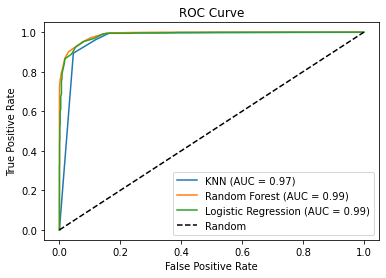

In [ ]:
# ROC кривые для каждой из моделей
for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Задание 6

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Функция для оценки прибыли
def calculate_profit(y_true, y_pred, cost_fn, cost_fp):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    profit = tp * cost_tp - fn * cost_fn - fp * cost_fp
    return profit

In [ ]:
thresholds = np.arange(0.0, 1.1, 0.1)
cost_tp, cost_fn, cost_fp = 1, 10, 5

profits = {}

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    best_profit = -np.inf
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        profit = calculate_profit(y_test, y_pred, cost_fn, cost_fp)

        if profit > best_profit:
            best_profit = profit
            best_threshold = threshold

    profits[name] = (best_threshold, best_profit)

print("Оптимальные пороги и прибыли:")
print(profits)

Оптимальные пороги и прибыли:
{'KNN': (0.30000000000000004, 9794), 'Random Forest': (0.2, 9794), 'Logistic Regression': (0.30000000000000004, 9816)}


# Задание 7

In [ ]:
!python.exe -m pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install openpyxl
!pip install doubleml
!pip install pgmpy
!pip install networkx
!pip install matplotlib

zsh:1: command not found: python.exe


# Задание 8